# From "That's hard in Excel" to "That's easy in Python!"

We have sales data coming from three regions; we need to clean them up and then combine them for analysis. 

Our files are the following and we've identified these errors:

| Region | File           | Status                            |
| ------ | -------------- | --------------------------------- |
| 1      | `region_1.csv` | Looks OK                          |
| 2      | `region_2.csv` | Convert `category` to proper case |
| 3      | `region_3.csv` | Where is `region`?                |



In [1]:
# Do you remember how to read in the csv files?
import pandas as pd
# We may want to visualize something 😉
import seaborn as sns
import matplotlib.pyplot as plt

region_1 = pd.read_csv('region_1.csv')
region_1.head()


In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


,region,id,channel,category,sales
0,1,197,1,Fresh,30624
1,1,197,1,Milk,7209
2,1,197,1,Grocery,4897
3,1,197,1,Frozen,18711
4,1,197,1,Deli,2876


## Region 2: Convert `category` to proper case

In [2]:
region_2 = pd.read_csv('region_2.csv')
region_2.head()

,region,id,channel,category,sales
0,2,294,2,FRESH,3996
1,2,294,2,MILK,11103
2,2,294,2,GROCERY,12469
3,2,294,2,FROZEN,902
4,2,294,2,DELI,741


To do this, we will use the [`str.title()` method from `pandas`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html). This works on Series, so we will need to convert the column to a Series and then add it back to the DataFrame:  

In [3]:
region_2['category'] = region_2['category'].str.title()
region_2.head()

,region,id,channel,category,sales
0,2,294,2,Fresh,3996
1,2,294,2,Milk,11103
2,2,294,2,Grocery,12469
3,2,294,2,Frozen,902
4,2,294,2,Deli,741


## Region 3: Add a `region` field

In [4]:
region_3 = pd.read_csv('region_3.csv')
region_3.head()

,id,channel,category,sales
0,1,2,Fresh,12669
1,1,2,Milk,9656
2,1,2,Grocery,7561
3,1,2,Frozen,214
4,1,2,Deli,1338


Do you remember how to add a column? All we need is the number `3` down all rows. 

In [5]:
region_3['region'] = 3
region_3.head()

,id,channel,category,sales,region
0,1,2,Fresh,12669,3
1,1,2,Milk,9656,3
2,1,2,Grocery,7561,3
3,1,2,Frozen,214,3
4,1,2,Deli,1338,3


## Appending the files

Now that we've cleaned up our three reports, let's combine them into one file. We can use `concat()` from `pandas` to do a row-wise binding of these DataFrames based on their column names. (Check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) for other options.)

In [6]:
# Append our three reports
sales_report = pd.concat([region_1, region_2, region_3])
sales_report.head()

,region,id,channel,category,sales
0,1,197,1,Fresh,30624
1,1,197,1,Milk,7209
2,1,197,1,Grocery,4897
3,1,197,1,Frozen,18711
4,1,197,1,Deli,2876


In [7]:
# Did we get all the data? 
# i.e. do I have the 
sales_report.shape[0] == region_1.shape[0] + region_2.shape[0] + region_3.shape[0]

True

## Data analysis



For our report, we would like to know the average sales for each category. 

In [21]:
sales_report.groupby('category')[['sales']].mean()

,sales
category,
Deli,1524.870455
Detergents,2881.493182
Fresh,12000.297727
Frozen,3071.931818
Grocery,7951.277273
Milk,5796.265909


We will visualize this as well.

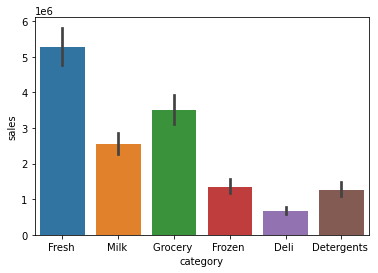

In [22]:
# Bar plot of sales by category
sns.barplot(x='category',y='sales',data=sales_report,estimator=sum)

I'd like to clean this up so that the chart is sorted and of the same color, and we have a chart title. This takes a bit of wrangling, so I hope this is good incentive for you to continue practicing! 

In [25]:
# Order our "PivotTable" by sales (descending) so that we know how to order the bar plot...
result = sales_report.groupby('category')[['sales']].mean().reset_index().sort_values('sales',ascending=False)
result

,category,sales
2,Fresh,12000.297727
4,Grocery,7951.277273
5,Milk,5796.265909
3,Frozen,3071.931818
1,Detergents,2881.493182
0,Deli,1524.870455


Text(0.5, 1.0, 'Sales by category')

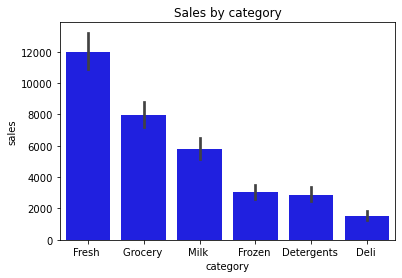

In [28]:
# Order the bar plot based on the "PivotTable", add color and title
sns.barplot(x='category', y="sales", data=sales_report, 
            order=result['category'],color='blue') 
plt.title('Sales by category')

# Epilogue: Python-Powered Excel

I hope that this workshop got you excited to learn Python and showed you how much about working with data you already know as an Excel user. 

I encourage you to keep practicing and have some resources in the Conclusion section of our slides for today.

As one last "sneak peek" for how to use Python and Excel, let's take a look at the below code to **export our cleaned-up raw sales data and resulting summary visualization.** 

This involves learning some new Python functionalities which I cover in another OLT, "Python-Powered Excel." For now, I would just like to show you the possibilities of using Python together with Excel. 

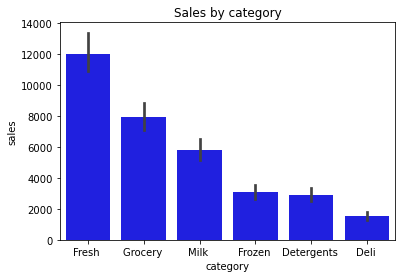

In [34]:
### The below is a demo only -- don't worry about the code itself
### but instead focus on the result: We can fully automate Excel by using Python!


# This uses yet another module
import xlsxwriter

# Set pandas engine to xlsxwriter
writer = pd.ExcelWriter('sales-report.xlsx',engine='xlsxwriter')

# Convert DataFrame to xlsxwriter object -- hide DataFrame index
# Name the worksheet 'data'
sales_report.to_excel(writer,sheet_name='data',index=False)

# Get xlsxwriter objects from DataFrame writer object
workbook = writer.book
worksheet = writer.sheets['data']

# Freeze first row of header worksheet
worksheet.freeze_panes(1,0)

# Save a picture of our bar chart from earlier 
sns.barplot(x='category', y="sales", data=sales_report, 
            order=result['category'],color='blue') 
plt.title('Sales by category')
plt.savefig('sales.png',bbox_inches='tight',dpi=(400))

# Create a new worksheet called `chart`
worksheet2 = workbook.add_worksheet('chart')

#Add image `sales.png` to the workbook
worksheet2.insert_image('A1','sales.png')

# Close the workbook and get pumped to learn more Python!
workbook.close()


# You will now find `sales-report.xlsx` in this folder. 